In [1]:
!pip install praw pandas textblob wordcloud matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.0 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

sentiment
Positive    1003
Negative     512
Neutral      485
Name: count, dtype: int64


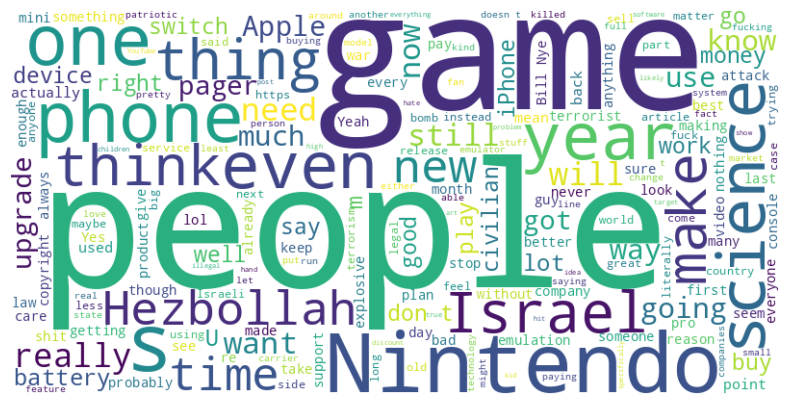

In [5]:
import praw
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",module="praw")


# Step 1: Reddit API authentication
reddit = praw.Reddit(
    client_id='rfORob-MEErY9Rq8G8qnCA',
    client_secret='-KIFhsIm-u-PAO2O27EB62YcgZJ6dA',
    user_agent='my_reddit_scraper'
)

# Step 2: Define the search parameters
subreddits = ['technology', 'IT', 'IoT', 'sustainability', 'BigData']
query = 'Technology OR IT OR IoT OR Sustainability OR BigData'
time_filter = 'month'  # or 'week' or 'day' for recent data

# Step 3: Scrape comments from relevant Reddit posts
comments = []
for subreddit in subreddits:
    subreddit_instance = reddit.subreddit(subreddit)
    for submission in subreddit_instance.search(query, time_filter=time_filter, limit=100):
        submission.comments.replace_more(limit=0)  # Replace "more comments" with actual comments
        for comment in submission.comments.list():
            comments.append(comment.body)

# Step 4: Limit the comments to 2000
comments = comments[:2000]

# Step 5: Perform sentiment analysis using TextBlob
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Step 6: Create a DataFrame and apply sentiment analysis
df = pd.DataFrame(comments, columns=['comment'])
df['sentiment'] = df['comment'].apply(analyze_sentiment)

# Step 7: Display sentiment counts
print(df['sentiment'].value_counts())

# Step 8: Generate a word cloud for visualization
text = ' '.join(comment for comment in df['comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Step 9: Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 10: Save the DataFrame with comments and sentiment
df.to_csv('reddit_comments_sentiment.csv', index=False)
